In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_excel("base_final_final_.xlsx")
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

In [52]:
df.head()

,nome_planilha_feedback,sala,num,nome_completo,aula_1_8_fev_2025_pre_class,aula_1_8_fev_2025_p,aula_1_8_fev_2025_hw,aula_1_8_fev_2025_cp,aula_1_8_fev_2025_bh,aula_2_15_fev_2025_pre_class,...,behavior_positive,behavior_percent,data_do_ultimo_login_conta_cpm,status_da_conta_cpm,quantidade_de_reprovacoes_no_curso_4_reprovacoes_perda_de_vaga,status_aluno_semestre_anterior,aluno_pode_trancar_matricula_ou_manter_trancamento_alunos_com_status_nao_ja_fizeram_trancamento_no_passado,situacao_aluno_no_semestre,motivo_nao_frequentando,recomendacao_conselho_aprovado_slash_reprovado
0,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,1,Estudante 1 - Campinas Four Corners A1,0,1,0,2,0,1,...,13,1,2025-12-07 14:38:03,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
1,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,2,Estudante 2 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1,2025-05-22 14:42:09,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
2,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,3,Estudante 3 - Campinas Four Corners A1,0,1,0,2,0,1,...,12,1,2025-06-06 21:55:13,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
3,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,4,Estudante 4 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1,2025-06-13 11:40:05,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
4,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,5,Estudante 5 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1,2025-05-30 20:47:43,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Columns: 114 entries, nome_planilha_feedback to recomendacao_conselho_aprovado_slash_reprovado
dtypes: object(114)
memory usage: 1.7+ MB


count     1976
unique    1777
top          0
freq       106
Name: nota_final, dtype: int64


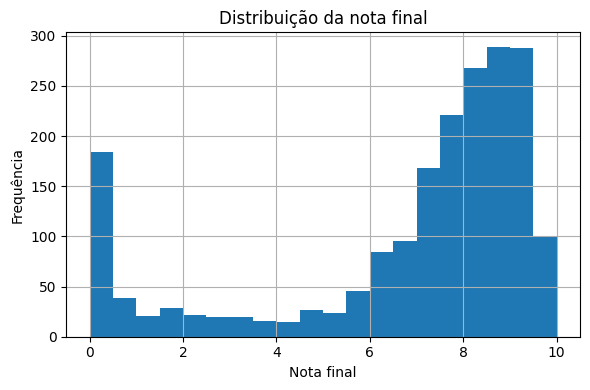

In [54]:
#Destribuição da nota final
import numpy as np
import matplotlib.pyplot as plt

df_0_10 = df[(df['nota_final'] >= 0) & (df['nota_final'] <= 10)]

print(df['nota_final'].describe())


plt.figure(figsize=(6,4))
df_0_10['nota_final'].hist(bins=20)
plt.xlabel('Nota final')
plt.ylabel('Frequência')
plt.title('Distribuição da nota final')
plt.tight_layout()
plt.show()


In [55]:
variaveis_engajamento = [
    'pre_class_percent',
    'presence_percent',
    'homework_percent',
    'class_participation_percent',
    'behavior_percent'
]

print(df[variaveis_engajamento + ['nota_final']].corr()['nota_final'])


0
pre_class_percent              0.857314
presence_percent               0.896809
homework_percent               0.863737
class_participation_percent    0.870207
behavior_percent               0.505464
nota_final                     1.000000
Name: nota_final, dtype: float64


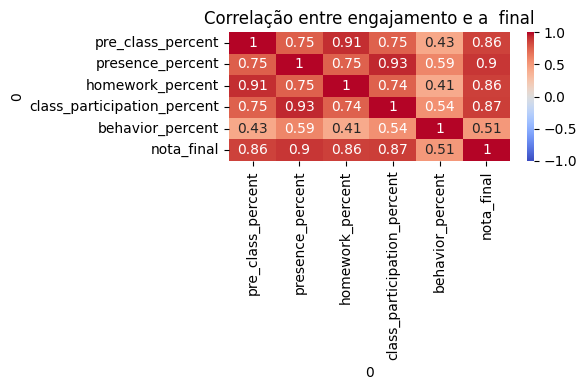

In [56]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df[variaveis_engajamento + ['nota_final']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre engajamento e a  final')
plt.tight_layout()
plt.show()


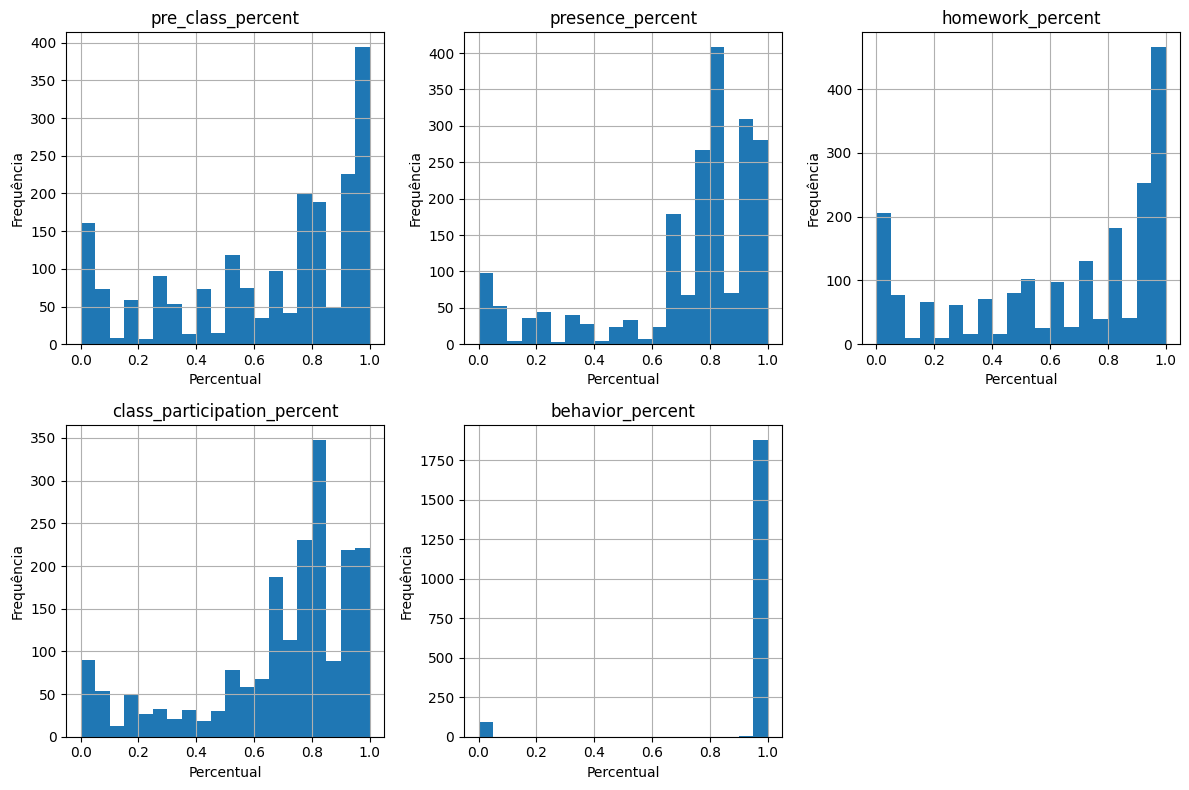

In [57]:
#df[variaveis_engajamento] = df[variaveis_engajamento].apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(2, 3, figsize=(12,8))
axes = axes.ravel()

for i, col in enumerate(variaveis_engajamento):
    df[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Percentual')
    axes[i].set_ylabel('Frequência')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


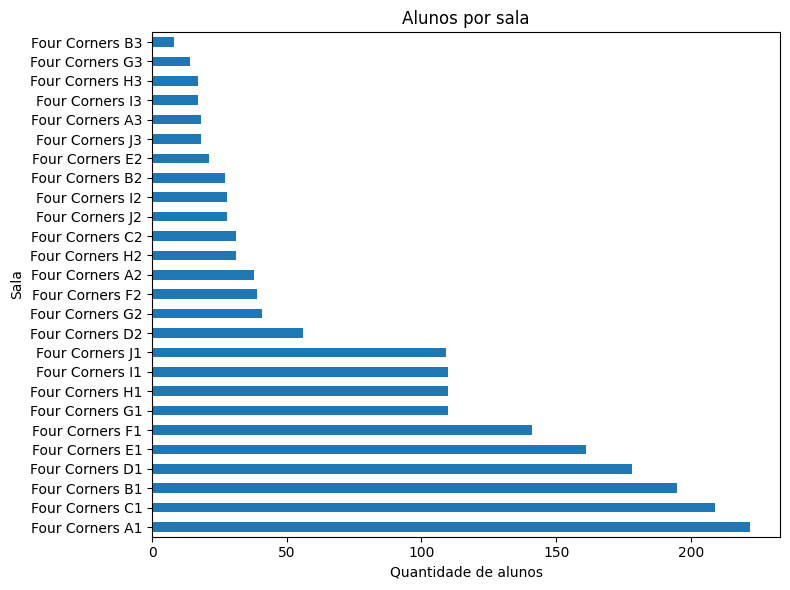

In [58]:
plt.figure(figsize=(8,6))
df['sala'].value_counts().plot(kind='barh')
plt.xlabel('Quantidade de alunos')
plt.ylabel('Sala')
plt.title('Alunos por sala')
plt.tight_layout()
plt.show()


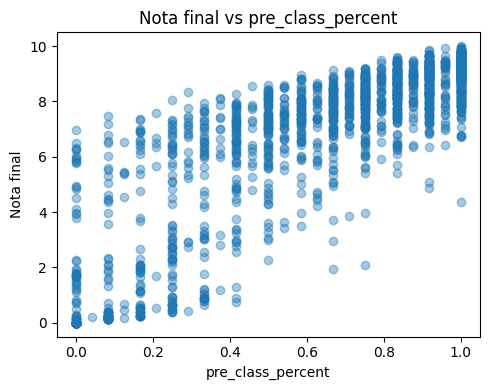

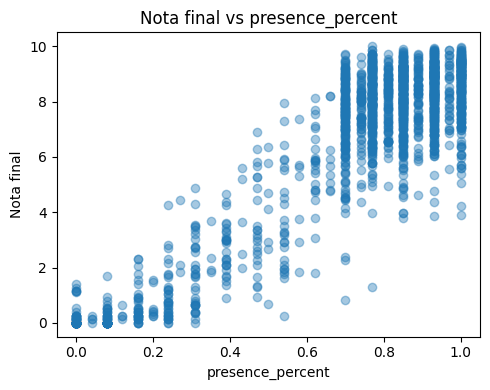

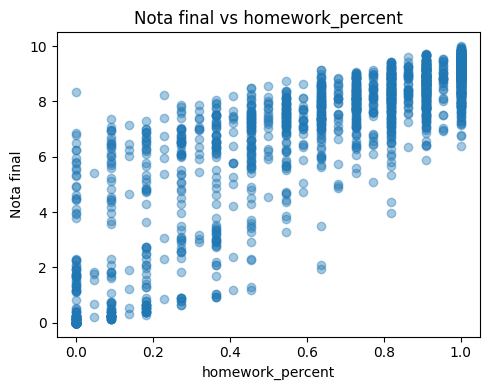

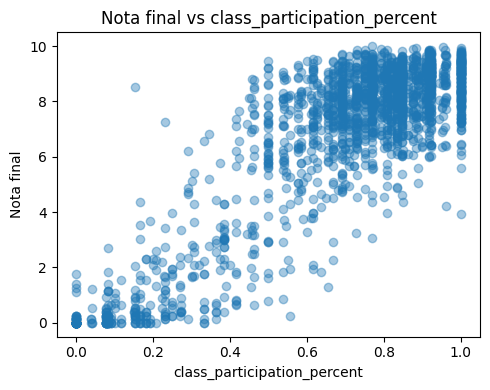

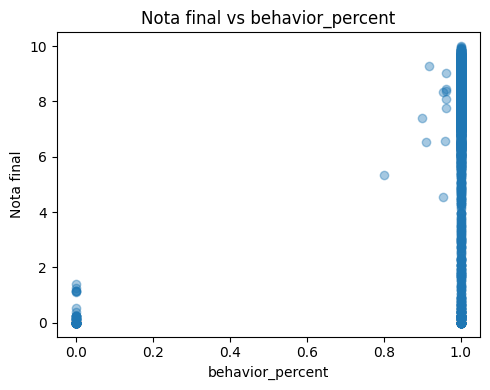

In [59]:
for col in variaveis_engajamento:
    plt.figure(figsize=(5,4))
    plt.scatter(df_0_10[col], df_0_10['nota_final'], alpha=0.4)
    plt.xlabel(col)
    plt.ylabel('Nota final')
    plt.title(f'Nota final vs {col}')
    plt.tight_layout()
    plt.show()


In [60]:
df['faixa_presence'] = pd.cut(
    df['presence_percent'],
    bins=[0, 0.5, 0.75, 1.01],
    labels=['<=50%', '50–75%', '>=75%']
)

df['faixa_preclass'] = pd.cut(
    df['pre_class_percent'],
    bins=[0, 0.33, 0.66, 1.01],
    labels=['baixa', 'média', 'alta']
)

print(df.groupby('faixa_presence')['nota_final'].mean())
print(df.groupby('faixa_preclass')['nota_final'].mean())


faixa_presence
<=50%     1.466744
50–75%    6.881896
>=75%     8.216677
Name: nota_final, dtype: object
faixa_preclass
baixa    2.930452
média    6.426455
alta      8.46721
Name: nota_final, dtype: object


/tmp/ipython-input-1252184182.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('faixa_presence')['nota_final'].mean())
/tmp/ipython-input-1252184182.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('faixa_preclass')['nota_final'].mean())


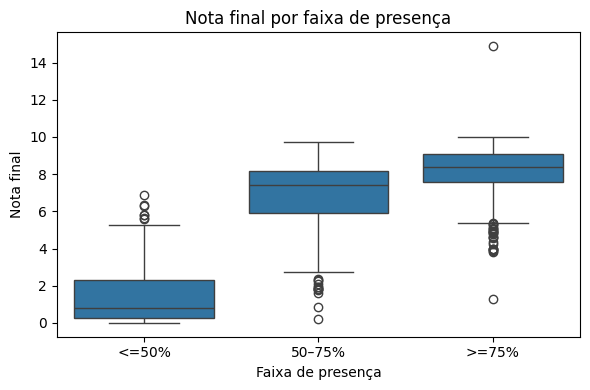

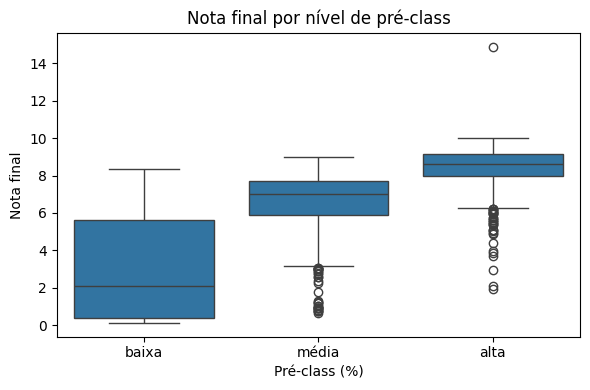

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='faixa_presence', y='nota_final')
plt.xlabel('Faixa de presença')
plt.ylabel('Nota final')
plt.title('Nota final por faixa de presença')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='faixa_preclass', y='nota_final')
plt.xlabel('Pré-class (%)')
plt.ylabel('Nota final')
plt.title('Nota final por nível de pré-class')
plt.tight_layout()
plt.show()


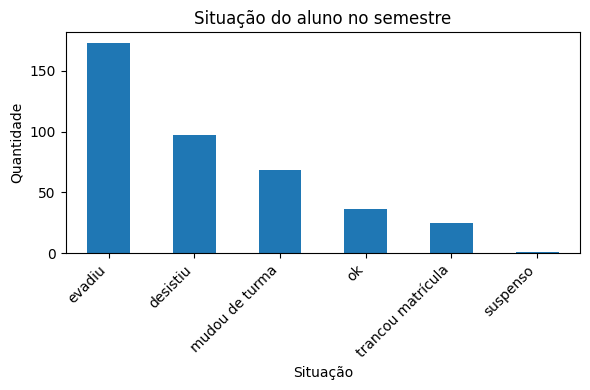

In [62]:
plt.figure(figsize=(6,4))
df['situacao_aluno_no_semestre'].value_counts().plot(kind='bar')
plt.xlabel('Situação')
plt.ylabel('Quantidade')
plt.title('Situação do aluno no semestre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


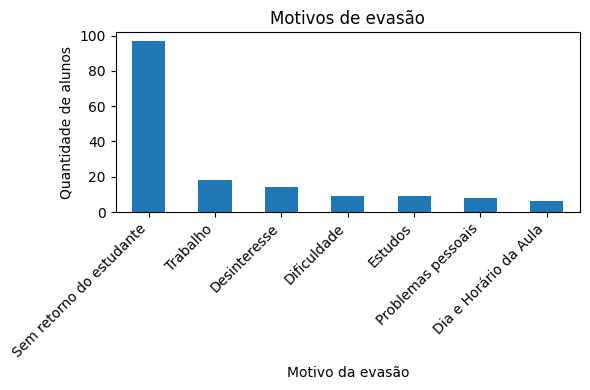

In [63]:
situacao_col = 'situacao_aluno_no_semestre'
motivo_col = 'motivo_nao_frequentando'

df_evadiu = df[df[situacao_col] == 'evadiu']

plt.figure(figsize=(6,4))
df_evadiu[motivo_col].value_counts().plot(kind='bar')
plt.xlabel('Motivo da evasão')
plt.ylabel('Quantidade de alunos')
plt.title('Motivos de evasão')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


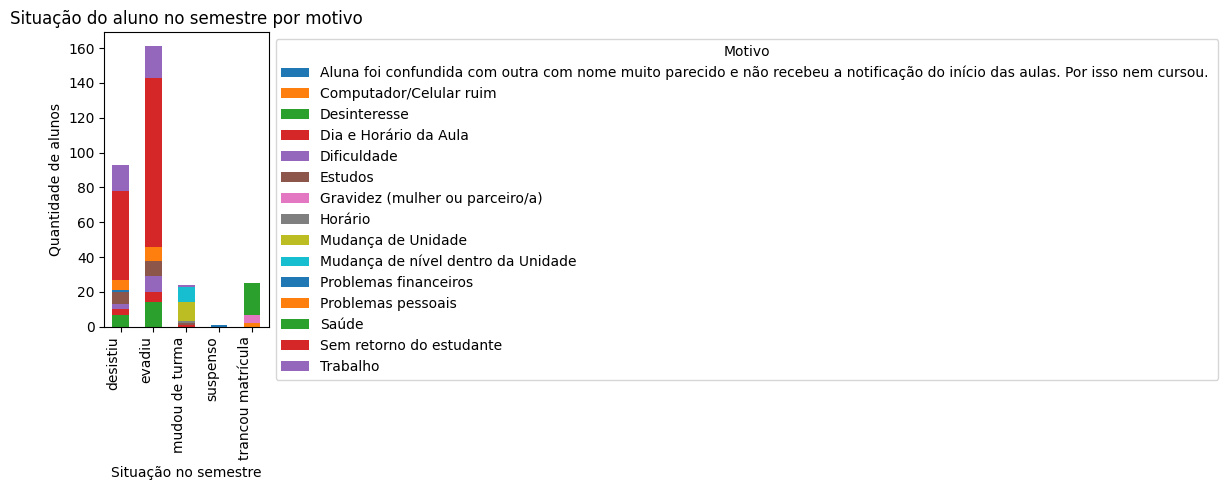

In [64]:
situacao_col = 'situacao_aluno_no_semestre'
motivo_col   = 'motivo_nao_frequentando'

tab = (
    df.groupby([situacao_col, motivo_col])
      .size()
      .unstack(fill_value=0)
)

ax = tab.plot(
    kind='bar',
    stacked=True,
    figsize=(12,5)
)

ax.set_xlabel('Situação no semestre')
ax.set_ylabel('Quantidade de alunos')
ax.set_title('Situação do aluno no semestre por motivo')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Motivo', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


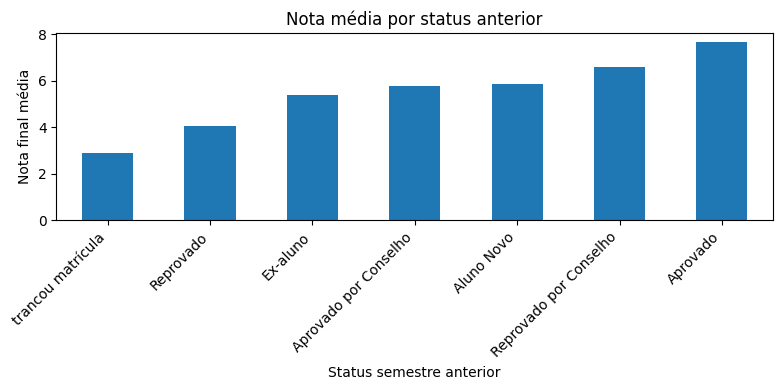

In [65]:
status_cols = ['status_aluno_semestre_anterior', 'nota_final']
tmp = df_0_10[status_cols].dropna()

plt.figure(figsize=(8,4))
tmp.groupby('status_aluno_semestre_anterior')['nota_final'].mean().sort_values().plot(kind='bar')
plt.ylabel('Nota final média')
plt.xlabel('Status semestre anterior')
plt.title('Nota média por status anterior')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


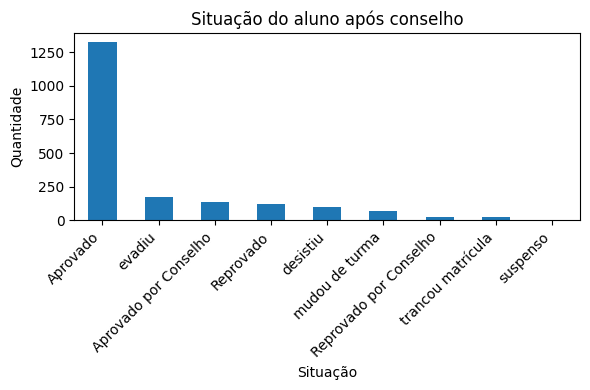

In [66]:
plt.figure(figsize=(6,4))
df['recomendacao_conselho_aprovado_slash_reprovado'].value_counts().plot(kind='bar')
plt.xlabel('Situação')
plt.ylabel('Quantidade')
plt.title('Situação do aluno após conselho')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

